In [2]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
import matplotlib.pyplot as plt

In [3]:
# read prepared data
df_umsatz = pd.read_csv("../0_DataPreparation/Data/umsatz_gesamt_feiertage.csv", parse_dates=['Datum'])
df_umsatz = df_umsatz.sort_values(["Warengruppe", "Datum", "Umsatz"]).reset_index(drop=True)
df_umsatz

,Datum,Warengruppe,Umsatz,Wochentag,Kategorie,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Monat,wetter_sonnig,wetter_wolken,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,sunday_or_holiday
0,2013-07-01,1.0,148.828353,Monday,Brot,0,6.0,17.8375,15.0,20.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,2013-07-02,1.0,159.793757,Tuesday,Brot,0,3.0,17.3125,10.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2013-07-03,1.0,111.885594,Wednesday,Brot,0,7.0,21.0750,6.0,61.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,2013-07-04,1.0,168.864941,Thursday,Brot,0,7.0,18.8500,7.0,20.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,2013-07-05,1.0,171.280754,Friday,Brot,0,5.0,19.9750,12.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,2017-12-21,6.0,87.471228,Thursday,Saisonbrot,0,7.0,6.2375,10.0,21.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
9330,2017-12-22,6.0,71.911652,Friday,Saisonbrot,0,7.0,5.7625,9.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
9331,2017-12-23,6.0,84.062223,Saturday,Saisonbrot,0,7.0,7.8000,19.0,61.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
9332,2017-12-24,6.0,60.981969,Sunday,Saisonbrot,0,7.0,8.1125,16.0,61.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [4]:
# read train.csv template
df_tmp = pd.read_csv("train.csv", parse_dates=['Datum'])
df_tmp

,id,Datum,Warengruppe,Umsatz
0,1307011,2013-07-01,1,148.828353
1,1307021,2013-07-02,1,159.793757
2,1307031,2013-07-03,1,111.885594
3,1307041,2013-07-04,1,168.864941
4,1307051,2013-07-05,1,171.280754
...,...,...,...,...
9329,1712216,2017-12-21,6,87.471228
9330,1712226,2017-12-22,6,71.911652
9331,1712236,2017-12-23,6,84.062223
9332,1712246,2017-12-24,6,60.981969


In [5]:
# merge the data with the template
df_umsatz_id = pd.merge(df_tmp, df_umsatz, on=['Datum', 'Warengruppe'], how='left')
df_umsatz_id = df_umsatz_id.drop("Umsatz_y", axis = 1)
df_umsatz_id = df_umsatz_id.rename(columns={'Umsatz_x': 'Umsatz'})
df_umsatz_id


,id,Datum,Warengruppe,Umsatz,Wochentag,Kategorie,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Monat,wetter_sonnig,wetter_wolken,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,sunday_or_holiday
0,1307011,2013-07-01,1,148.828353,Monday,Brot,0,6.0,17.8375,15.0,20.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,1307021,2013-07-02,1,159.793757,Tuesday,Brot,0,3.0,17.3125,10.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1307031,2013-07-03,1,111.885594,Wednesday,Brot,0,7.0,21.0750,6.0,61.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,1307041,2013-07-04,1,168.864941,Thursday,Brot,0,7.0,18.8500,7.0,20.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,1307051,2013-07-05,1,171.280754,Friday,Brot,0,5.0,19.9750,12.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,1712216,2017-12-21,6,87.471228,Thursday,Saisonbrot,0,7.0,6.2375,10.0,21.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
9330,1712226,2017-12-22,6,71.911652,Friday,Saisonbrot,0,7.0,5.7625,9.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
9331,1712236,2017-12-23,6,84.062223,Saturday,Saisonbrot,0,7.0,7.8000,19.0,61.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
9332,1712246,2017-12-24,6,60.981969,Sunday,Saisonbrot,0,7.0,8.1125,16.0,61.0,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [6]:
df_umsatz_id["sunday_or_holiday"]

0       0
1       0
2       0
3       0
4       0
       ..
9329    0
9330    0
9331    0
9332    1
9333    0
Name: sunday_or_holiday, Length: 9334, dtype: int64

In [7]:
# Initial check for missing values
print("Missing values per column before handling:\n", df_umsatz.isnull().sum())

# Replace missing values for numerical columns with the column's mean
numerical_cols = df_umsatz_id.select_dtypes(include=[np.number]).columns
df_umsatz_id[numerical_cols] = df_umsatz_id[numerical_cols].fillna(df_umsatz_id[numerical_cols].mean())

# Replace missing values for non-numerical columns with the mode (most common value)
non_numerical_cols = df_umsatz_id.select_dtypes(exclude=[np.number]).columns
for col in non_numerical_cols:
    df_umsatz_id[col] = df_umsatz_id[col].fillna(df_umsatz_id[col].mode()[0])  # Fill missing values with mode

# Final drop of any rows with remaining NaN values (if any)
df_umsatz_id = df_umsatz_id.dropna()

# Recheck for missing values
print("Missing values per column after handling:\n", df_umsatz.isnull().sum())

print(df_umsatz)
print(df_umsatz.columns)

Missing values per column before handling:
 Datum                     0
Warengruppe               0
Umsatz                    0
Wochentag                 0
Kategorie                 0
KielerWoche               0
Bewoelkung               70
Temperatur               16
Windgeschwindigkeit      16
Wettercode             2325
Monat                    16
wetter_sonnig          2325
wetter_wolken          2325
wetter_regen           2325
wetter_schnee          2325
wetter_gewitter        2325
wetter_dunst           2325
wetter_nebel           2325
sunday_or_holiday         0
dtype: int64
Missing values per column after handling:
 Datum                     0
Warengruppe               0
Umsatz                    0
Wochentag                 0
Kategorie                 0
KielerWoche               0
Bewoelkung               70
Temperatur               16
Windgeschwindigkeit      16
Wettercode             2325
Monat                    16
wetter_sonnig          2325
wetter_wolken          2325
wett

In [8]:
# select features
features = ['KielerWoche','wetter_sonnig', 'wetter_wolken', 'wetter_regen',
       'wetter_schnee', 'wetter_gewitter', 'wetter_dunst', 'wetter_nebel',
       'sunday_or_holiday']
X = df_umsatz_id[features]
Y = df_umsatz_id["Umsatz"]

# Scale the feature data to standardize the range
scalar = StandardScaler()

# apply standardization of features to umsatz dataframe
standardized_features = pd.DataFrame(scalar.fit_transform(df_umsatz_id[features].copy()), columns = features)
old_shape = df_umsatz_id.shape
# drop the unnormalized features from the dataframe
df_umsatz_id.drop(features, axis = 1, inplace = True)
# join back the normalized features
df_umsatz_id = pd.concat([df_umsatz_id, standardized_features], axis= 1)
df_umsatz_id


,id,Datum,Warengruppe,Umsatz,Wochentag,Kategorie,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Monat,KielerWoche,wetter_sonnig,wetter_wolken,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,sunday_or_holiday
0,1307011,2013-07-01,1,148.828353,Monday,Brot,6.0,17.8375,15.0,20.000000,7.0,-0.156448,-0.570613,2.362701e+00,-0.994495,-0.218697,-1.659459e-01,-0.551718,-0.167135,-0.427454
1,1307021,2013-07-02,1,159.793757,Tuesday,Brot,3.0,17.3125,10.0,36.900128,7.0,-0.156448,0.000000,-8.122233e-17,0.000000,0.000000,-2.841806e-17,0.000000,0.000000,-0.427454
2,1307031,2013-07-03,1,111.885594,Wednesday,Brot,7.0,21.0750,6.0,61.000000,7.0,-0.156448,-0.570613,-5.636414e-01,1.339089,-0.218697,-1.659459e-01,-0.551718,-0.167135,-0.427454
3,1307041,2013-07-04,1,168.864941,Thursday,Brot,7.0,18.8500,7.0,20.000000,7.0,-0.156448,-0.570613,2.362701e+00,-0.994495,-0.218697,-1.659459e-01,-0.551718,-0.167135,-0.427454
4,1307051,2013-07-05,1,171.280754,Friday,Brot,5.0,19.9750,12.0,36.900128,7.0,-0.156448,0.000000,-8.122233e-17,0.000000,0.000000,-2.841806e-17,0.000000,0.000000,-0.427454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,1712216,2017-12-21,6,87.471228,Thursday,Saisonbrot,7.0,6.2375,10.0,21.000000,12.0,-0.156448,-0.570613,2.362701e+00,-0.994495,-0.218697,-1.659459e-01,-0.551718,-0.167135,-0.427454
9330,1712226,2017-12-22,6,71.911652,Friday,Saisonbrot,7.0,5.7625,9.0,10.000000,12.0,-0.156448,-0.570613,-5.636414e-01,-0.994495,-0.218697,-1.659459e-01,2.413765,-0.167135,-0.427454
9331,1712236,2017-12-23,6,84.062223,Saturday,Saisonbrot,7.0,7.8000,19.0,61.000000,12.0,-0.156448,-0.570613,-5.636414e-01,1.339089,-0.218697,-1.659459e-01,-0.551718,-0.167135,-0.427454
9332,1712246,2017-12-24,6,60.981969,Sunday,Saisonbrot,7.0,8.1125,16.0,61.000000,12.0,-0.156448,-0.570613,-5.636414e-01,1.339089,-0.218697,-1.659459e-01,-0.551718,-0.167135,2.339435


In [9]:
# Convert the 'Datum' column to datetime
df_umsatz_id['Datum'] = pd.to_datetime(df_umsatz_id['Datum'])

# Split the DataFrame into two based on the specified date ranges
df_umsatz_train = df_umsatz_id[df_umsatz_id['Datum'] <= '2017-07-31']
df_umsatz_test = df_umsatz_id[(df_umsatz_id['Datum'] > '2017-07-31') & (df_umsatz_id['Datum'] <= '2018-07-31')]
df_umsatz_test = df_umsatz_test.reset_index(drop=True)
df_umsatz_train

,id,Datum,Warengruppe,Umsatz,Wochentag,Kategorie,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Monat,KielerWoche,wetter_sonnig,wetter_wolken,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,sunday_or_holiday
0,1307011,2013-07-01,1,148.828353,Monday,Brot,6.0,17.8375,15.0,20.000000,7.0,-0.156448,-0.570613,2.362701e+00,-0.994495,-0.218697,-1.659459e-01,-0.551718,-0.167135,-0.427454
1,1307021,2013-07-02,1,159.793757,Tuesday,Brot,3.0,17.3125,10.0,36.900128,7.0,-0.156448,0.000000,-8.122233e-17,0.000000,0.000000,-2.841806e-17,0.000000,0.000000,-0.427454
2,1307031,2013-07-03,1,111.885594,Wednesday,Brot,7.0,21.0750,6.0,61.000000,7.0,-0.156448,-0.570613,-5.636414e-01,1.339089,-0.218697,-1.659459e-01,-0.551718,-0.167135,-0.427454
3,1307041,2013-07-04,1,168.864941,Thursday,Brot,7.0,18.8500,7.0,20.000000,7.0,-0.156448,-0.570613,2.362701e+00,-0.994495,-0.218697,-1.659459e-01,-0.551718,-0.167135,-0.427454
4,1307051,2013-07-05,1,171.280754,Friday,Brot,5.0,19.9750,12.0,36.900128,7.0,-0.156448,0.000000,-8.122233e-17,0.000000,0.000000,-2.841806e-17,0.000000,0.000000,-0.427454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9273,1612226,2016-12-22,6,54.322960,Thursday,Saisonbrot,7.0,5.2500,8.0,61.000000,12.0,-0.156448,-0.570613,-5.636414e-01,1.339089,-0.218697,-1.659459e-01,-0.551718,-0.167135,-0.427454
9274,1612236,2016-12-23,6,133.499200,Friday,Saisonbrot,7.0,6.3750,9.0,10.000000,12.0,-0.156448,-0.570613,-5.636414e-01,-0.994495,-0.218697,-1.659459e-01,2.413765,-0.167135,-0.427454
9275,1612246,2016-12-24,6,39.577538,Saturday,Saisonbrot,6.0,6.1250,14.0,95.000000,12.0,-0.156448,-0.570613,-5.636414e-01,-0.994495,-0.218697,8.025003e+00,-0.551718,-0.167135,-0.427454
9276,1612276,2016-12-27,6,48.890718,Tuesday,Saisonbrot,6.0,8.2500,21.0,36.900128,12.0,-0.156448,0.000000,-8.122233e-17,0.000000,0.000000,-2.841806e-17,0.000000,0.000000,-0.427454


In [10]:
df_umsatz_test

,id,Datum,Warengruppe,Umsatz,Wochentag,Kategorie,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Monat,KielerWoche,wetter_sonnig,wetter_wolken,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,sunday_or_holiday
0,1708011,2017-08-01,1,166.135486,Tuesday,Brot,6.0,21.3750,7.0,21.000000,8.0,-0.156448,-0.570613,2.362701e+00,-0.994495,-0.218697,-1.659459e-01,-0.551718,-0.167135,-0.427454
1,1708021,2017-08-02,1,155.022099,Wednesday,Brot,5.0,21.3750,8.0,61.000000,8.0,-0.156448,-0.570613,-5.636414e-01,1.339089,-0.218697,-1.659459e-01,-0.551718,-0.167135,-0.427454
2,1708031,2017-08-03,1,159.575340,Thursday,Brot,7.0,20.1250,10.0,95.000000,8.0,-0.156448,-0.570613,-5.636414e-01,-0.994495,-0.218697,8.025003e+00,-0.551718,-0.167135,-0.427454
3,1708041,2017-08-04,1,161.585239,Friday,Brot,6.0,19.6250,18.0,21.000000,8.0,-0.156448,-0.570613,2.362701e+00,-0.994495,-0.218697,-1.659459e-01,-0.551718,-0.167135,-0.427454
4,1708051,2017-08-05,1,198.088094,Saturday,Brot,4.0,20.1250,12.0,36.900128,8.0,-0.156448,0.000000,-8.122233e-17,0.000000,0.000000,-2.841806e-17,0.000000,0.000000,-0.427454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,1712216,2017-12-21,6,87.471228,Thursday,Saisonbrot,7.0,6.2375,10.0,21.000000,12.0,-0.156448,-0.570613,2.362701e+00,-0.994495,-0.218697,-1.659459e-01,-0.551718,-0.167135,-0.427454
1837,1712226,2017-12-22,6,71.911652,Friday,Saisonbrot,7.0,5.7625,9.0,10.000000,12.0,-0.156448,-0.570613,-5.636414e-01,-0.994495,-0.218697,-1.659459e-01,2.413765,-0.167135,-0.427454
1838,1712236,2017-12-23,6,84.062223,Saturday,Saisonbrot,7.0,7.8000,19.0,61.000000,12.0,-0.156448,-0.570613,-5.636414e-01,1.339089,-0.218697,-1.659459e-01,-0.551718,-0.167135,-0.427454
1839,1712246,2017-12-24,6,60.981969,Sunday,Saisonbrot,7.0,8.1125,16.0,61.000000,12.0,-0.156448,-0.570613,-5.636414e-01,1.339089,-0.218697,-1.659459e-01,-0.551718,-0.167135,2.339435


In [11]:
# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(df_umsatz_train[features])

# Train the linear regression model using Statsmodels
model = sm.OLS(df_umsatz_train["Umsatz"], X_train).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     18.02
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           5.77e-30
Time:                        14:02:49   Log-Likelihood:                -47984.
No. Observations:                7493   AIC:                         9.599e+04
Df Residuals:                    7483   BIC:                         9.606e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               209.4729      1.70

In [12]:
# Make predictions on the test set
X_test = sm.add_constant(df_umsatz_test[features])  # Add constant to test set for predictions
predictions = model.predict(X_test)
print("Predictions for test data:", predictions)

Predictions for test data: 0       209.418686
1       200.734177
2       236.363230
3       209.418686
4       201.141511
           ...    
1836    209.418686
1837    185.106136
1838    200.734177
1839    248.043146
1840    209.418686
Length: 1841, dtype: float64


In [13]:
# Add predictions to the test dataframe
df_umsatz_test['Predicted_Umsatz'] = predictions

# Remove duplicate rows
df_umsatz_test = df_umsatz_test.drop_duplicates()

# Select only the 'id' and 'Predicted_Umsatz' columns
df_to_save = df_umsatz_test[['id', 'Predicted_Umsatz']]

# Save the dataframe with predictions to a new CSV file
df_to_save.to_csv('predicted_umsatz_test.csv', index=False)

df_to_save

,id,Predicted_Umsatz
0,1708011,209.418686
1,1708021,200.734177
2,1708031,236.363230
3,1708041,209.418686
4,1708051,201.141511
...,...,...
1836,1712216,209.418686
1837,1712226,185.106136
1838,1712236,200.734177
1839,1712246,248.043146


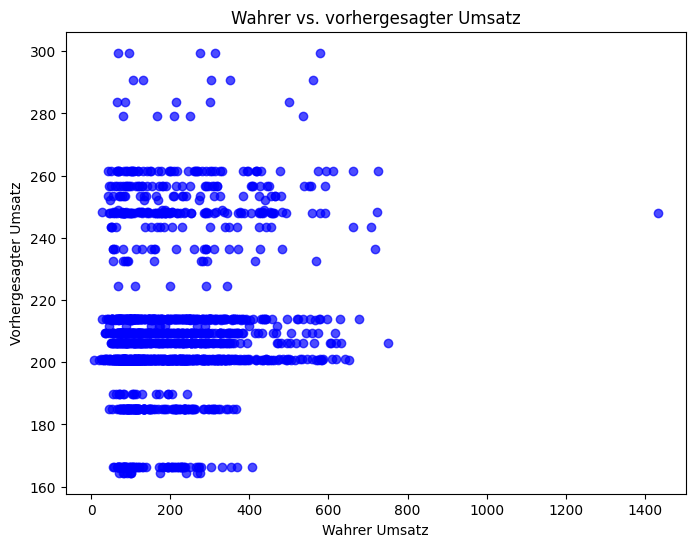

In [14]:
# Scatter plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(df_umsatz_test.Umsatz, predictions, alpha=0.7, color="blue")
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Wahrer Umsatz")
plt.ylabel("Vorhergesagter Umsatz")
plt.title("Wahrer vs. vorhergesagter Umsatz")
plt.show()

/tmp/ipykernel_6401/1104804505.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1400], [0, 1400], 'k--', color="red")


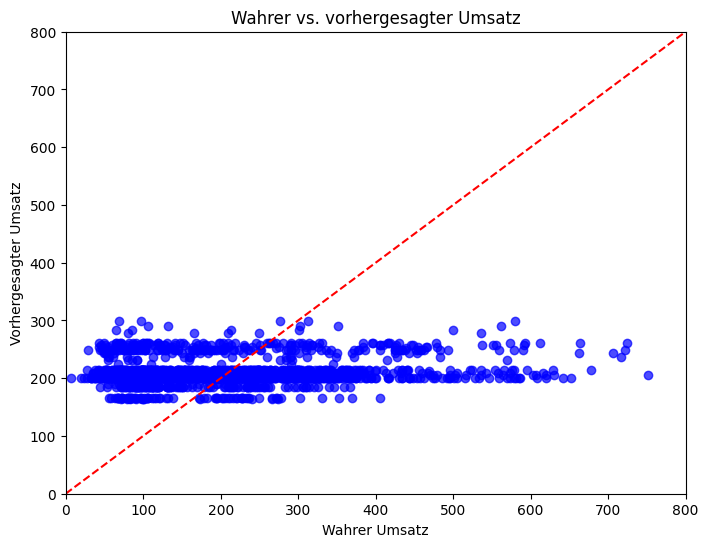

In [16]:
# Scatter plot Alternative: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(df_umsatz_test.Umsatz, predictions, alpha=0.7, color="blue")

# Achsen skalieren
plt.xlim(0, 800)
plt.ylim(0, 800)

# Optionale Linie zur Visualisierung einer perfekten Vorhersage
plt.plot([0, 800], [0, 800], 'k--', color="red")

# Achsenbeschriftungen und Titel
plt.xlabel("Wahrer Umsatz")
plt.ylabel("Vorhergesagter Umsatz")
plt.title("Wahrer vs. vorhergesagter Umsatz")

# Plot anzeigen
plt.show()
